<a href="https://colab.research.google.com/github/Transega/Vegettion_loss_Using-Radar-Images/blob/main/Vegetation_Loss_Using_Radar_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installs geemap package
import subprocess
 
try:
    import geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])
 
# Checks whether this notebook is running on Google Colab
try:
    import google.colab
    import geemap.eefolium as geemap
except:
    import geemap
 
# Authenticates and initializes Earth Engine
import ee
 
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

geemap package not installed. Installing ...
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=IKxDikZWRIm6iSLqO5xkwSWpAwE1IbXgpOpmkI5QKEI&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g4td6BqVYE6PnJIw7jliq-WzvXwMl_ARy1o2LUWJva0jWXsU0SHOvQ

Successfully saved authorization token.


Import Libraries 

In [ ]:
import ee
import geemap
import geemap.eefolium
# from geemap import cartoee



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, gamma, f, chi2
import IPython.display as disp
%matplotlib inline

#Define Area of interest

In [ ]:

Counties_affected = ee.FeatureCollection('users/collinsasegaca/Affected_counties')
roi = Counties_affected

In [ ]:
# Function to convert shapefile into gee object
def conv(in_shp):
  ee_object = geemap.shp_to_ee(in_shp)
  return ee_object

In [ ]:
 #Load Sentinel-1 C-band SAR Ground Range collection (log scale, VV, descending)
#def CollectionVV(VV):
collectionVV = ee.ImageCollection('COPERNICUS/S1_GRD') \
 .filter(ee.Filter.eq('instrumentMode', 'IW')) \
 .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV')) \
 .filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING')) \
 .filterMetadata('resolution_meters','equals' , 10) \
 .filterBounds(roi) \
 .select('VV')
 

In [ ]:
#// Load Sentinel-1 C-band SAR Ground Range collection (log scale, VH, descending)
#def CollectionVH(VH):
collectionVH = ee.ImageCollection('COPERNICUS/S1_GRD') \
  .filter(ee.Filter.eq('instrumentMode', 'IW')) \
  .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')) \
  .filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING')) \
  .filterMetadata('resolution_meters','equals' , 10) \
  .filterBounds(roi) \
  .select('VH')


In [ ]:
#Filter by date
first2019VV = collectionVV.filterDate('2019-12-01', '2019-12-25').mosaic().clip(roi);
second2020VV = collectionVV.filterDate('2020-01-01', '2020-01-31').mosaic().clip(roi);
third2020VV = collectionVV.filterDate('2020-03-01', '2020-03-20').mosaic().clip(roi);
first2019VH = collectionVH.filterDate('2019-12-01', '2019-12-25').mosaic().clip(roi);
second2020VH = collectionVH.filterDate('2020-01-01', '2020-01-31').mosaic().clip(roi);
third2020VH = collectionVH.filterDate('2020-03-01', '2020-03-20').mosaic().clip(roi);

In [ ]:

# Display map
Map1 = geemap.Map()
Map1.centerObject(roi, 10);
Map1.addLayer(first2019VV, {'min':-15,max:0}, 'Before Attack 2019 VV', 0);
Map1.addLayer(second2020VV, {'min':-15,max:0}, 'After attack 2020 VV', 0); #(rgb, {'min': [-20, -20, 0], 'max': [0, 0, 2]}, 'FFA')
Map1.addLayer(third2020VV, {'min':-15,max:0}, 'After Attack_in_March 2020 VV', 0);
Map1.addLayer(first2019VH, {'min':-27,max:0}, 'Before attack 2019 VH', 0);
Map1.addLayer(second2020VH, {'min':-27,max:0}, 'After Attack 2020 VH', 0);
Map1.addLayer(third2020VH, {'min':-27,max:0}, 'After attack in March 2020 VH', 0);
Map1.addLayer(first2019VH.addBands(second2020VH).addBands(third2020VH), {'min': -27, max: -8}, '2019/2020/2020_march RGB', 1)
Map1.addLayerControl()



I have a challenge in obtaining full image that covers entire Turkana County Therefore I chose to exclude it in the Area of Interest

In [ ]:
Map1

Save visualization by building a web map


In [ ]:
Map1.save('S1_vis.html',close_file=True)

New Area of Interest
link https://code.earthengine.google.com/?asset=users/collinsasegaca/affected_ex_turkana

In [ ]:
#Turkana = './drive/MyDrive/omdena/affected_counties/brokendown/Turkana.shp'
AOI_EXLD_TURKANA = ee.FeatureCollection('users/collinsasegaca/affected_ex_turkana') # this shapefile excludes Turkana county 
# Function to convert shapefile into gee object
# def conv(in_shp):
#   ee_object = geemap.shp_to_ee(in_shp)
#   return ee_object

# **Define New area of interest**

In [ ]:
#turkana = conv(Turkana)
New_roi = AOI_EXLD_TURKANA

Filtering by date and clipping to the Area of Interest

In [ ]:
first2019VV = collectionVV.filterDate('2019-12-01', '2019-12-25').mosaic().clip(New_roi);
second2020VV = collectionVV.filterDate('2020-01-01', '2020-01-31').mosaic().clip(New_roi);
third2020VV = collectionVV.filterDate('2020-03-01', '2020-03-20').mosaic().clip(New_roi);
first2019VH = collectionVH.filterDate('2019-12-01', '2019-12-25').mosaic().clip(New_roi);
second2020VH = collectionVH.filterDate('2020-01-01', '2020-01-31').mosaic().clip(New_roi);
third2020VH = collectionVH.filterDate('2020-03-01', '2020-03-20').mosaic().clip(New_roi);

Visualize the images

In [ ]:
Map1 = geemap.Map()
Map1.centerObject(roi, 10);
Map1.addLayer(first2019VV, {'min':-15,max:0}, 'Before Attack 2019 VV', 0);
Map1.addLayer(second2020VV, {'min':-15,max:0}, 'After attack 2020 VV', 0); #(rgb, {'min': [-20, -20, 0], 'max': [0, 0, 2]}, 'FFA')
Map1.addLayer(third2020VV, {'min':-15,max:0}, 'After Attack_in_March 2020 VV', 0);
Map1.addLayer(first2019VH, {'min':-27,max:0}, 'Before attack 2019 VH', 0);
Map1.addLayer(second2020VH, {'min':-27,max:0}, 'After Attack 2020 VH', 0);
Map1.addLayer(third2020VH, {'min':-27,max:0}, 'After attack in March 2020 VH', 0);
Map1.addLayer(first2019VH.addBands(second2020VH).addBands(third2020VH), {'min': -27, max: -8}, '2019/2020/2020_march RGB', 0) #RGB image using the VH polarization of different dates
Map1.addLayerControl()

In [ ]:
Map1

# **Apply speckle a filter **
A speckle filter is a granular interfearance that inherently exists in radar images and causes derogation on quality of the active radar. 
The speckle are as a result of the rough terain that produces multiple backscatter to the Synthetic apparture radar instrument thereby affecting the overal reflectivity causing bright and dark spots in the image.
Thus this step is aimed at removing the speckle noise, since radar images have already been pre-processed by copernicus in terms of Geometric and atmospheric correcions 

In [ ]:
SMOOTHING_RADIUS = 50;
first2019VV_filtered = first2019VV.focal_mean(SMOOTHING_RADIUS, 'circle', 'meters');
first2019VH_filtered = first2019VH.focal_mean(SMOOTHING_RADIUS, 'circle', 'meters');
second2020VV_filtered = second2020VV.focal_mean(SMOOTHING_RADIUS, 'circle', 'meters');
second2020VH_filtered = second2020VH.focal_mean(SMOOTHING_RADIUS, 'circle', 'meters');
third2020VV_filtered = third2020VV.focal_mean(SMOOTHING_RADIUS, 'circle', 'meters');
third2020VH_filtered = third2020VH.focal_mean(SMOOTHING_RADIUS, 'circle', 'meters');

# **Perform image differencing for the before and after images**

Since the images here are on a log scale we do subtraction because thats the rule while dealing with logs (we subtract when we intend to divide while using Log)

In [ ]:
ratio1920VH= first2019VH_filtered.subtract(second2020VH_filtered);
ratio1920VV= first2019VV_filtered.subtract(second2020VV_filtered);
ratio2020_marchVH= second2020VH_filtered.subtract(third2020VH_filtered);
ratio2020_marchVV= second2020VV_filtered.subtract(third2020VV_filtered);

# **Create a histogram **

This is to help us visualize the distribution of the backscatter values

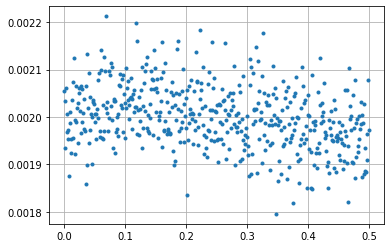

In [ ]:
# 2019 Dec/2020 Jan histogrm VV channel
hist = ratio1920VV.select('VV').reduceRegion(
    ee.Reducer.fixedHistogram(0, 0.5, 500),roi, scale=300 ).get('VV').getInfo()

a_1920 = np.array(hist)
x = a_1920[:, 0]                 # array of bucket edge positions
y = a_1920[:, 1]/np.sum(a_1920[:, 1]) # normalized array of bucket contents
plt.grid()
plt.plot(x, y, '.')
plt.show()

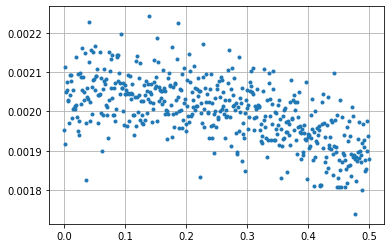

In [ ]:
# # 2019 Dec/2020 Jan histogrm VH channel
hist_VH = ratio1920VH.select('VH').reduceRegion(
    ee.Reducer.fixedHistogram(0, 0.5, 500),roi, scale=300 ).get('VH').getInfo()

a_VH = np.array(hist_VH)
x = a_VH[:, 0]                 # array of bucket edge positions
y = a_VH[:, 1]/np.sum(a_VH[:, 1]) # normalized array of bucket contents
plt.grid()
plt.plot(x, y, '.')
plt.show()

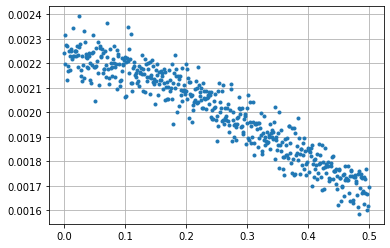

In [ ]:
# Histogram for the image ratio Jan 2020 to march 2020
hist_VV_2020 = ratio2020_marchVV.select('VV').reduceRegion(
    ee.Reducer.fixedHistogram(0, 0.5, 500),roi, scale=300 ).get('VV').getInfo()

a_VH = np.array(hist_VV_2020)
x = a_VH[:, 0]                 # array of bucket edge positions
y = a_VH[:, 1]/np.sum(a_VH[:, 1]) # normalized array of bucket contents
plt.grid()
plt.plot(x, y, '.')
plt.show()

Calculte the Mean, Standard deviation, and Variance to help us in application of Threshold

In [ ]:
#Calculate the mean and standard deviation for each ratio image
mean_1920 = ratio1920VH.select('VH').reduceRegion(
    ee.Reducer.mean(), roi, scale= 300).get('VH').getInfo()
variance_1920 = ratio1920VH.select('VH').reduceRegion(
    ee.Reducer.variance(), roi, scale=300).get('VH').getInfo()
std_1920 = ratio1920VH.select('VH').reduceRegion(
    ee.Reducer.stdDev(), roi, scale=300).get('VH').getInfo()
#Mean for the ratio2020_march
mean_2020_march = ratio2020_marchVH.select('VH').reduceRegion(
    ee.Reducer.mean(), roi, scale= 300).get('VH').getInfo()
variance_2020_march = ratio2020_marchVH.select('VH').reduceRegion(
    ee.Reducer.variance(), roi, scale=300).get('VH').getInfo()

std_2020_march = ratio2020_marchVH.select('VH').reduceRegion(
    ee.Reducer.stdDev(), roi, scale=300).get('VH').getInfo()

In [ ]:
print('mean_1920 = ', mean_1920, ' variance_1920= ', variance_1920, 'StdDev_ 1920 =',std_1920 )
print('mean_2020_march=',  mean_2020_march, 'variance_2020_march =', variance_2020_march, 'StdDev 2020_march= ', std_2020_march)

mean_1920 =  0.6599464806840196  variance_1920=  3.434454167386009 StdDev_ 1920 = 1.8532280397689889
mean_2020_march= 0.2262372349898941 variance_2020_march = 2.895423125421788 StdDev 2020_march=  1.7015942893127574


In [ ]:
thresh1920 = std_1920*1.5 + mean_1920
thresh2020_march = std_2020_march*1.5 + mean_2020_march

print(thresh1920)
print(thresh2020_march)

3.439788540337503
2.7786286689590303


**Apply threshold**
The threshold is calculated by multiplying the Standard deviation by 1.5 and adding the Mean

In [ ]:
RATIO_UPPER_THRESHOLD1920 = thresh1920;
RATIO_UPPER_THRESHOLD2020_march = thresh2020_march;
ratio1920VH_thresholded = ratio1920VH.gt(RATIO_UPPER_THRESHOLD1920);
ratio2020_marchVH_thresholded = ratio2020_marchVH.gt(RATIO_UPPER_THRESHOLD2020_march);

In [ ]:
legend_dict = {
    'Vegetation Loss Dec 2019/2020 Jan': 'FF0000',
    'Vegetation Loss Jan 2020/2020 march': '140b13'
}

In [ ]:
#//Display Masks
Map= geemap.Map()
Map.addLayer(ratio1920VH_thresholded.updateMask(ratio1920VH_thresholded),{'palette':"FF0000"},'Vegetation Loss Dec 2019/2020 Jan',1);
Map.addLayer(ratio2020_marchVH_thresholded.updateMask(ratio2020_marchVH_thresholded),{'palette':"140b13"},'Vegetation Loss Jan 2020/2020 march',1);

In [ ]:
Map.add_legend(legend_dict=legend_dict, title='Vegetation Loss DL affected Counties KE')
Map.centerObject(roi, 6)
Map.addLayerControl()
Map

In [ ]:
Map.save('VegetationLoss.html',close_file=True)

Export the Masks of Vegetation Loss

In [ ]:
# convert ratio 1920 to vector
vectratio_1920 = ratio1920VH_thresholded.reduceToVectors(**{
 'geometry': roi,
 'crs': ratio1920VH_thresholded.projection(),
 'scale': 300,
 'geometryType': 'polygon',
 'eightConnected': False,
 'labelProperty': 'null'
 })


In [ ]:
# convert ratio 2020_march to vector
vectratio_2020_march = ratio2020_marchVH_thresholded.reduceToVectors(**{
 'geometry': roi,
 'crs': ratio2020_marchVH_thresholded.projection(),
 'scale': 300,
 'geometryType': 'polygon',
 'eightConnected': False,
 'labelProperty': 'null'
 })

In [ ]:
M = geemap.Map()
M.addLayer(vectratio_1920,{}, 'Veg los 2019Dec to Jan 2020')
M.addLayer(vectratio_2020_march,{}, 'Veg Loss 2020 Jan to March' )
M.addLayerControl()
M.centerObject(roi, 5)

In [ ]:
M

In [ ]:
#geemap.ee_export_vector(ee_object, filename, selectors)
#def ee_export_vector_to_drive(ee_object, description, folder, file_format='shp', selectors=None)

geemap.ee_export_vector_to_drive(vectratio_1920, description='Veg_Loss_Dec_2019_Jan_2020', folder='omdena', file_format='shp', selectors=None)
#geemap.ee_export_image_to_drive(, description='Veg_Loss_Dec_2019_Jan_2020', folder='omdena', scale=10)

Exporting Veg_Loss_Dec_2019_Jan_2020...


In [ ]:
#geemap.ee_export_image_to_drive(, description='Veg_Loss_Jan_2020_to_March_2020', folder='omdena', scale=10)

Exporting Veg_Loss_Jan_2020_to_March_2020 ...


In [ ]:
geemap.ee_export_vector_to_drive(vectratio_2020_march, description='Veg_Loss_Jan_2020_to_March_2020', folder='omdena', file_format='shp', selectors=None)

Exporting Veg_Loss_Jan_2020_to_March_2020...


Calculate area loss for Dec 2019 to Jan 2020 and from Jan 2020 to March 2020

In [ ]:
#Compare differences in vegetation loss between 2019 December/2020 Jan and 2020 Jan/2020 March

area_loss1920 = ratio1920VH_thresholded.reduceRegion(
    ee.Reducer.sum(), roi, scale= 300,).getInfo()

area_loss2020_March2020 = ratio2020_marchVH_thresholded.reduceRegion(
    ee.Reducer.sum(), roi, scale= 300).getInfo()

In [ ]:
AOI = 'Counties affected'
print('pixel value ', area_loss1920)
vegloss_hactares = area_loss1920['VH']*9 # since the resolution is 300 then 300*300 =90000 convert to hactares means 90000/10000 =9
print('Vegetation loss for', AOI, 'December 2019 to Jan 2020 = ', vegloss_hactares, 'Hactares')
veglossKm2 = vegloss_hactares*0.01
print('Vegetation loss for', AOI, ' December 2019 to Jan 2020 = ', veglossKm2, 'Squared Kilometers')

pixel value  {'VH': 255920.9647058823}
Vegetation loss for Counties affected December 2019 to Jan 2020 =  2303288.6823529406 Hactares
Vegetation loss for Counties affected  December 2019 to Jan 2020 =  23032.886823529407 Squared Kilometers


Vegetation loss from Jan 2020 to March 2020 

for the counties affected excepted Turkana

In [ ]:
print('pixel value ',area_loss2020_March2020)
vegloss_hactares = area_loss2020_March2020['VH']*9 # since the resolution is 300 then 300*300 =90000 convert to hactares means 90000/10000 =9
print('Vegetation loss for', AOI, 'Jan 2020 to March 2020 = ', vegloss_hactares, 'Hactares')
veglossKm2 = vegloss_hactares*0.01
print('Vegetation loss for', AOI, 'Jan 2020 to March 2020 = ', veglossKm2, 'Squared Kilometers')

pixel value  {'VH': 264224.3568627451}
Vegetation loss for Counties affected Jan 2020 to March 2020 =  2378019.211764706 Hactares
Vegetation loss for Counties affected Jan 2020 to March 2020 =  23780.19211764706 Squared Kilometers


### **We can also compute area  loss according to various counties**

In [ ]:
# bring in the counties shapefiles 
Elgeiyo_Baringo = './drive/MyDrive/omdena/affected_counties/brokendown/Elgeyo_baringo.shp' # Elgeiyo Marakwet & Baringo 
Laikipia_samburu = './drive/MyDrive/omdena/affected_counties/brokendown/Laikipia_samburu.shp' #  Laikipia_samburu
Kitui = './drive/MyDrive/omdena/affected_counties/brokendown/Kitui.shp' # Kitui
Mandera = './drive/MyDrive/omdena/affected_counties/brokendown/Mandera.shp' # Mandera
Machakos_embu = './drive/MyDrive/omdena/affected_counties/brokendown/Machakos_embu.shp' # Machakos_embu
Marsabit = './drive/MyDrive/omdena/affected_counties/brokendown/Marsabit.shp' # Marsabit
Meru_isolo ='./drive/MyDrive/omdena/affected_counties/brokendown/Meru_isolo.shp' # Meru and Isiolo
Tana = './drive/MyDrive/omdena/affected_counties/brokendown/Tana.shp' #Tana
Turkana = './drive/MyDrive/omdena/affected_counties/brokendown/Turkana.shp' 
Wajir = './drive/MyDrive/omdena/affected_counties/brokendown/Wajir.shp' #Wajir 
Garissa = './drive/MyDrive/omdena/affected_counties/brokendown/Garissa.shp' # Garisa

Build function to compute Vegetation Loss

In [ ]:
def arealoss1920():
  area_loss1920 = ratio1920VH_thresholded.reduceRegion(
    ee.Reducer.sum(), roi, scale= 300,).getInfo()
  print('pixel value ', area_loss1920)
  vegloss_hactares = area_loss1920['VH']*9 # since the resolution is 300 then 300*300 =90000 convert to hactares means 90000/10000 =9
  print('Vegetation loss for', AOI, 'December 2019 to Jan 2020 = ', vegloss_hactares, 'Hactares')
  veglossKm2 = vegloss_hactares*0.01
  print('Vegetation loss for', AOI, ' December 2019 to Jan 2020 = ', veglossKm2, 'Squared Kilometers')
  return area_loss1920

def arealoss2020_march():
  area_loss2020_March2020 = ratio2020_marchVH_thresholded.reduceRegion(
    ee.Reducer.sum(), roi, scale= 300).getInfo()
  print('pixel value ',area_loss2020_March2020)
  vegloss_hactares = area_loss2020_March2020['VH']*9 # since the resolution is 300 then 300*300 =90000 convert to hactares means 90000/10000 =9
  print('Vegetation loss for', AOI, 'Jan 2020 to March 2020 = ', vegloss_hactares, 'Hactares')
  veglossKm2 = vegloss_hactares*0.01
  print('Vegetation loss for', AOI, 'Jan 2020 to March 2020 = ', veglossKm2, 'Squared Kilometers')
  return area_loss2020_March2020

# **Get statistics per county for Vegetation Los**s

Marsabit

In [ ]:
#get the results for Marsabit county
roi = conv(Marsabit)
AOI = 'Marsabit'
Marsabit_arealoss_1920 = arealoss1920()
Marsabit_arealoss_2020_march = arealoss2020_march()

pixel value  {'VH': 80795.75294117648}
Vegetation loss for Marsabit December 2019 to Jan 2020 =  727161.7764705884 Hactares
Vegetation loss for Marsabit  December 2019 to Jan 2020 =  7271.617764705884 Squared Kilometers
pixel value  {'VH': 26898.33333333332}
Vegetation loss for Marsabit Jan 2020 to March 2020 =  242084.99999999988 Hactares
Vegetation loss for Marsabit Jan 2020 to March 2020 =  2420.849999999999 Squared Kilometers


Elgeiyo Marakwet and Baringo

In [ ]:
roi = conv(Elgeiyo_Baringo)
AOI = 'Elgeiyo Marakwet & Baringo'
# Call the function to calculate the vegetation loss
Elgeiyo_Baringo_arealoss_1920 = arealoss1920() 
Elgeiyo_Baringo_arealoss_2020_march = arealoss2020_march()

pixel value  {'VH': 302.99607843137255}
Vegetation loss for Elgeiyo Marakwet & Baringo December 2019 to Jan 2020 =  2726.964705882353 Hactares
Vegetation loss for Elgeiyo Marakwet & Baringo  December 2019 to Jan 2020 =  27.26964705882353 Squared Kilometers
pixel value  {'VH': 917.9882352941175}
Vegetation loss for Elgeiyo Marakwet & Baringo Jan 2020 to March 2020 =  8261.894117647058 Hactares
Vegetation loss for Elgeiyo Marakwet & Baringo Jan 2020 to March 2020 =  82.61894117647059 Squared Kilometers


Laikipia & Samburu 
Note: the lower counties seem to have experienced Massive destruction in the period in between Jan to March 2020

In [ ]:
roi = conv(Laikipia_samburu)
AOI = 'Laikipia & samburu'
# Call the function to calculate the vegetation loss
Laikipia_samburu_arealoss_1920 = arealoss1920() 
Laikipia_samburu_arealoss_2020_march = arealoss2020_march()


pixel value  {'VH': 4821.878431372547}
Vegetation loss for Laikipia & samburu December 2019 to Jan 2020 =  43396.90588235293 Hactares
Vegetation loss for Laikipia & samburu  December 2019 to Jan 2020 =  433.9690588235293 Squared Kilometers
pixel value  {'VH': 7777.631372549019}
Vegetation loss for Laikipia & samburu Jan 2020 to March 2020 =  69998.68235294118 Hactares
Vegetation loss for Laikipia & samburu Jan 2020 to March 2020 =  699.9868235294118 Squared Kilometers


Kitui

In [ ]:

roi = conv(Kitui)
AOI = 'Kitui'
# Call the function to calculate the vegetation loss
Kitui_arealoss_1920 = arealoss1920() 
Kitui_arealoss_2020_march = arealoss2020_march()

pixel value  {'VH': 2313.7882352941174}
Vegetation loss for Kitui December 2019 to Jan 2020 =  20824.094117647055 Hactares
Vegetation loss for Kitui  December 2019 to Jan 2020 =  208.24094117647056 Squared Kilometers
pixel value  {'VH': 3660.709803921569}
Vegetation loss for Kitui Jan 2020 to March 2020 =  32946.38823529412 Hactares
Vegetation loss for Kitui Jan 2020 to March 2020 =  329.4638823529412 Squared Kilometers


Mandera

In [ ]:
roi = conv(Mandera)
AOI = 'Mandera'
# Call the function to calculate the vegetation loss
Mandera_arealoss_1920 = arealoss1920() 
Mandera_arealoss_2020_march = arealoss2020_march()

pixel value  {'VH': 3698.035294117647}
Vegetation loss for Mandera December 2019 to Jan 2020 =  33282.31764705882 Hactares
Vegetation loss for Mandera  December 2019 to Jan 2020 =  332.82317647058824 Squared Kilometers
pixel value  {'VH': 1313.1607843137247}
Vegetation loss for Mandera Jan 2020 to March 2020 =  11818.447058823522 Hactares
Vegetation loss for Mandera Jan 2020 to March 2020 =  118.18447058823521 Squared Kilometers


Machakos & Embu

In [ ]:
roi = conv(Machakos_embu)
AOI = 'Machakos & embu'
# Call the function to calculate the vegetation loss
Machakos_embu_arealoss_1920 = arealoss1920() 
Machakos_embu_arealoss_2020_march = arealoss2020_march()

pixel value  {'VH': 1836.219607843137}
Vegetation loss for Machakos & embu December 2019 to Jan 2020 =  16525.976470588233 Hactares
Vegetation loss for Machakos & embu  December 2019 to Jan 2020 =  165.25976470588233 Squared Kilometers
pixel value  {'VH': 186.43137254901958}
Vegetation loss for Machakos & embu Jan 2020 to March 2020 =  1677.8823529411764 Hactares
Vegetation loss for Machakos & embu Jan 2020 to March 2020 =  16.778823529411763 Squared Kilometers


Meru & Isolo

In [ ]:
roi = conv(Meru_isolo)
AOI = 'Meru and isolo'
# Call the function to calculate the vegetation loss
Meru_isolo_arealoss_1920 = arealoss1920() 
Meru_isolo_arealoss_2020_march = arealoss2020_march()

pixel value  {'VH': 57454.541176470586}
Vegetation loss for Meru and isolo December 2019 to Jan 2020 =  517090.87058823527 Hactares
Vegetation loss for Meru and isolo  December 2019 to Jan 2020 =  5170.9087058823525 Squared Kilometers
pixel value  {'VH': 28889.874509803918}
Vegetation loss for Meru and isolo Jan 2020 to March 2020 =  260008.87058823527 Hactares
Vegetation loss for Meru and isolo Jan 2020 to March 2020 =  2600.0887058823528 Squared Kilometers


Tana

In [ ]:
roi = conv(Tana)
AOI = 'Tana'
# Call the function to calculate the vegetation loss
Tana_arealoss_1920 = arealoss1920() 
Tana_arealoss_2020_march = arealoss2020_march()


pixel value  {'VH': 5638.066666666667}
Vegetation loss for Tana December 2019 to Jan 2020 =  50742.6 Hactares
Vegetation loss for Tana  December 2019 to Jan 2020 =  507.426 Squared Kilometers
pixel value  {'VH': 89166.49019607838}
Vegetation loss for Tana Jan 2020 to March 2020 =  802498.4117647053 Hactares
Vegetation loss for Tana Jan 2020 to March 2020 =  8024.984117647054 Squared Kilometers


Wajir

In [ ]:

roi = conv(Wajir)
AOI = 'Wajir'
# Call the function to calculate the vegetation loss
Wajir_arealoss_1920 = arealoss1920() 
Wajir_arealoss_2020_march = arealoss2020_march()

pixel value  {'VH': 93956.89803921578}
Vegetation loss for Wajir December 2019 to Jan 2020 =  845612.0823529421 Hactares
Vegetation loss for Wajir  December 2019 to Jan 2020 =  8456.120823529422 Squared Kilometers
pixel value  {'VH': 61183.13333333333}
Vegetation loss for Wajir Jan 2020 to March 2020 =  550648.2 Hactares
Vegetation loss for Wajir Jan 2020 to March 2020 =  5506.482 Squared Kilometers


Garissa

In [ ]:

roi = conv(Garissa)
AOI = 'Garissa'
# Call the function to calculate the vegetation loss
Garissa_arealoss_1920 = arealoss1920() 
Garissa_arealoss_2020_march = arealoss2020_march()

pixel value  {'VH': 4517.172549019608}
Vegetation loss for Garissa December 2019 to Jan 2020 =  40654.55294117647 Hactares
Vegetation loss for Garissa  December 2019 to Jan 2020 =  406.54552941176473 Squared Kilometers
pixel value  {'VH': 44161.85490196081}
Vegetation loss for Garissa Jan 2020 to March 2020 =  397456.6941176473 Hactares
Vegetation loss for Garissa Jan 2020 to March 2020 =  3974.566941176473 Squared Kilometers
